In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
#we know that 'Pclass','SibSp','Parch','Fare' columns as data and ‘Survived’ column as label
#so dropping others
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

# Model Building

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy Score:\n',accuracy_score(y_test, y_pred))

Accuracy Score:
 0.6815642458100558


In [16]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold
model = LogisticRegression()
kf=KFold(n_splits=10)
score=cross_val_score(model,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.58888889 0.66292135 0.71910112 0.61797753 0.69662921 0.6741573
 0.70786517 0.70786517 0.74157303 0.75280899]

Average of Cross Validation Scores: 0.6869787765293383


# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier as knn
#find k with highest accuracy
acc_val=[]
neighbors=np.arange(1,20)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

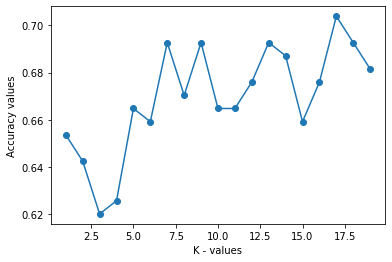

In [18]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [19]:
# we got K value 17 has highest accuracy 70+
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=17)
model_knn.fit(X_train,y_train)

y_pred = model_knn.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))

Accuracy Score:
 0.7039106145251397


In [20]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=10)
score=cross_val_score(model_knn,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.6        0.57303371 0.6741573  0.6741573  0.68539326 0.69662921
 0.70786517 0.70786517 0.69662921 0.74157303]

Average of Cross Validation Scores: 0.6757303370786516


# SVM

In [21]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear')
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))

Accuracy Score:
 0.6983240223463687


In [22]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)
print("Cross Validation Scores are: {}\n".format(score))
print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.61452514 0.65730337 0.66292135 0.7247191  0.74719101]

Average of Cross Validation Scores: 0.6813319942250958


# DecisionTree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))

Accuracy Score:
 0.6480446927374302


In [24]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(dt,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.66480447 0.64044944 0.69662921 0.70786517 0.73033708]

Average of Cross Validation Scores: 0.6880170736300295


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators = 100)
rf=rf.fit(X_test,y_test)

y_pred = rf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))

Accuracy Score:
 0.8994413407821229


In [26]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
kf=KFold(n_splits=10)
score=cross_val_score(rf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.71111111 0.62921348 0.6741573  0.58426966 0.65168539 0.7752809
 0.71910112 0.75280899 0.74157303 0.70786517]

Average of Cross Validation Scores: 0.6947066167290885


# Grid Search CV for SVM

In [27]:
#Use grid search to identify the best possible SVM model from the following search space:

parameters ={'C': [0.1, 1, 10, 100, 1000],
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(
    SVC(), 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

In [28]:
result = grid_search.fit(X_train,y_train)

In [29]:
print('Best Params: ', result.best_params_)
print('Best Score: ', result.best_score_)

Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score:  0.7022751895991333


In [30]:
# Rebuilding SVM model based on the best params obtained from grid search CV

model_svc = SVC(kernel='rbf', C=1000, gamma=0.001)
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))

Accuracy Score:
 0.6815642458100558


In [31]:
kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.63687151 0.64606742 0.73033708 0.71348315 0.74157303]

Average of Cross Validation Scores: 0.6936664365074383
